In [20]:
import pandas as pd
import numpy as np 
import os
# py -m pip install openpyxl
import openpyxl as xl

In [21]:
sciezka = os.getcwd()
plik = os.path.join(sciezka, 'apf_data.xlsx')
print(sciezka)
print(plik)

c:\Users\s-A009-26\Desktop\Zaj_2
c:\Users\s-A009-26\Desktop\Zaj_2\apf_data.xlsx


In [22]:
ramka = pd.read_excel(plik, '1', header = 0)
ramka.set_index(['countrycode', 'year'], inplace = True)
ramka.head()

rgdpna       rnna       emp
countrycode year                                
ARG         2010  13.759205  14.761623  2.894626
            2011  13.817511  14.801410  2.917123
            2012  13.807194  14.831745  2.933394
            2013  13.830963  14.861097  2.950966
            2014  13.805516  14.884328  2.964399

In [23]:
print("rozmiar danych: ", ramka.shape)
print("typ danych: ", type(ramka))

rozmiar danych:  (330, 3)
typ danych:  <class 'pandas.core.frame.DataFrame'>


In [24]:
y = ramka[['rgdpna']] # lub y = ramka.rgdpna
print('y type: ', type(y), '\n size: ', y.shape)

x0 = pd.DataFrame(np.ones(y.shape), index = ramka.index, columns = ['const'])
X = pd.concat([x0, ramka[['rnna', 'emp']]], axis = 1)
print('rozmiar X: ', X.shape)
print('typ X: ', type(X))
print(X.info)

y type:  <class 'pandas.core.frame.DataFrame'> 
 size:  (330, 1)
rozmiar X:  (330, 3)
typ X:  <class 'pandas.core.frame.DataFrame'>
<bound method DataFrame.info of                   const       rnna       emp
countrycode year                            
ARG         2010    1.0  14.761623  2.894626
            2011    1.0  14.801410  2.917123
            2012    1.0  14.831745  2.933394
            2013    1.0  14.861097  2.950966
            2014    1.0  14.884328  2.964399
...                 ...        ...       ...
USA         2015    1.0  17.990721  5.012290
            2016    1.0  18.004731  5.026489
            2017    1.0  18.019311  5.041309
            2018    1.0  18.035101  5.054179
            2019    1.0  18.050478  5.064489

[330 rows x 3 columns]>


## Kilka wykresów
$\Sigma \alpha$

$ oznacza tryb matematyczny

In [25]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Box plot')

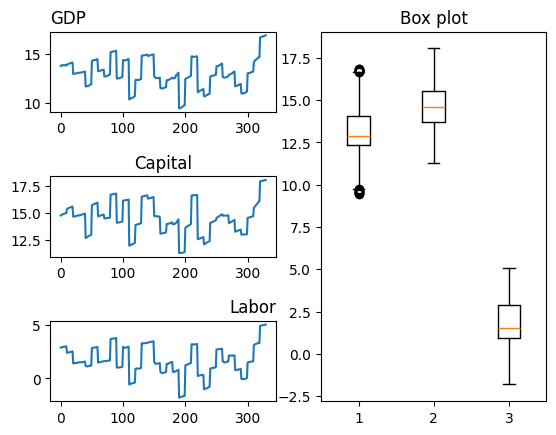

In [26]:
h = plt.figure()
ax = plt.subplot2grid((3,2), (0,0))
hlp = np.array(range(y.shape[0]))
plt.plot(hlp, y)
plt.title('GDP', loc = 'left')

plt.subplot2grid((3,2),(1,0))
plt.plot(hlp, X.rnna)
plt.title('Capital')

plt.subplot2grid((3,2),(2,0))
plt.plot(hlp, X.emp)
plt.title('Labor', loc = 'right')
plt.subplots_adjust(hspace = 0.8)

# wykres pudełkowy

MyBox = plt.subplot2grid((3,2),(0,1), rowspan = 3)
MyBox.boxplot(ramka)
plt.title('Box plot')

#h.show
#plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

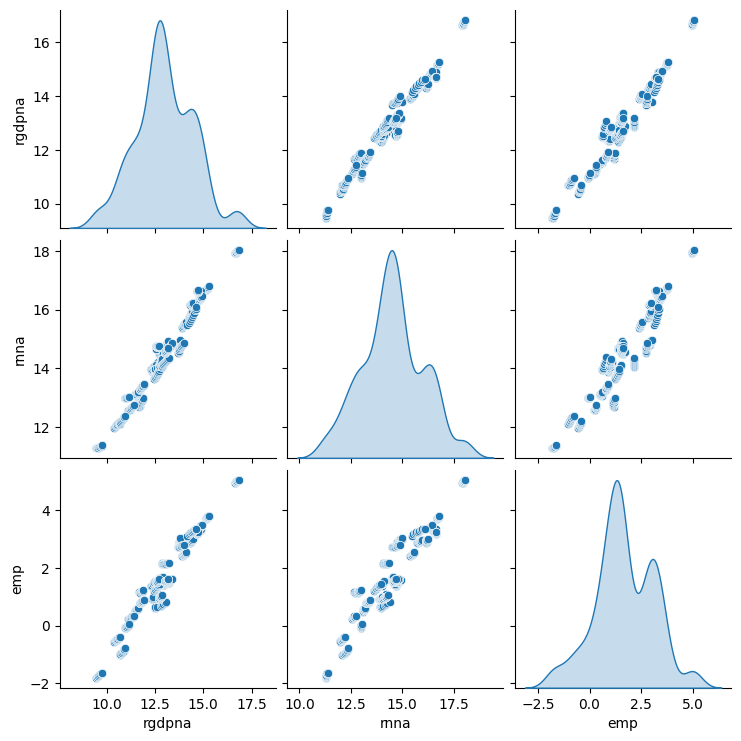

In [28]:
# histogramy i wykresy rozrzutu
# py -m pip install seaborn
import seaborn as sb
sb.pairplot(ramka, kind = 'scatter', diag_kind = 'kde', )
plt.show

<Axes: >

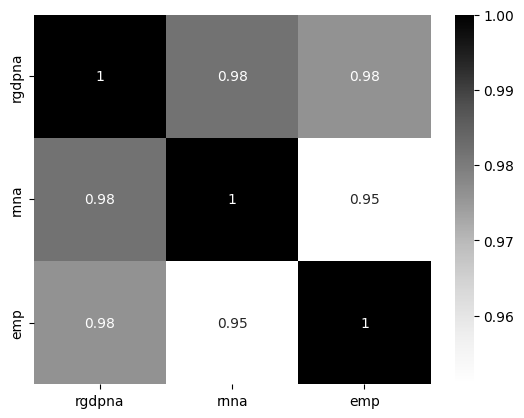

In [29]:
# tablica korelacji jako heatmapa
sb.heatmap(ramka.corr(), cmap = 'Greys', annot = True)

In [34]:
# liczymy prosty model regresji
# py -m pip install statsmodels
import statsmodels.api as sm
import math
ob_wyn = sm.OLS(y, X).fit() #obiekt wyników; istnieje jeszcze obiekt modelu; obiekt wyników daje nam .fit(), bez tego byłby obiekt modelu
print(ob_wyn.params)
print(ob_wyn.cov_params()) #macierz kowariancji oszacowanych parametrów
ob_wyn.summary()

const    4.034120
rnna     0.562312
emp      0.469449
dtype: float64
          const      rnna       emp
const  0.092753 -0.007193  0.007060
rnna  -0.007193  0.000559 -0.000557
emp    0.007060 -0.000557  0.000613


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rgdpna   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     9296.
Date:                Tue, 01 Apr 2025   Prob (F-statistic):          7.23e-289
Time:                        14:23:21   Log-Likelihood:                 70.827
No. Observations:                 330   AIC:                            -135.7
Df Residuals:                     327   BIC:                            -124.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0341      0.305     13.246      0.000       3.435       4.633
rnna           0.5623      0.024     23.773      0.000       0.516       0.609
emp            0.4694      0.025     18.963      0.000       0.421       0.518
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.682
Skew:                           0.022   Prob(JB):                        0.711
Kurtosis:                       3.218   Cond. No.                         418.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""